### Pharmacokinetic model of a cancer drug

Pharmacokinetics, Lymph Node Uptake, and Mechanistic PK Model of Near-Infrared Dye-Labeled Bevacizumab After IV and SC Administration in Mice

Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3326166/


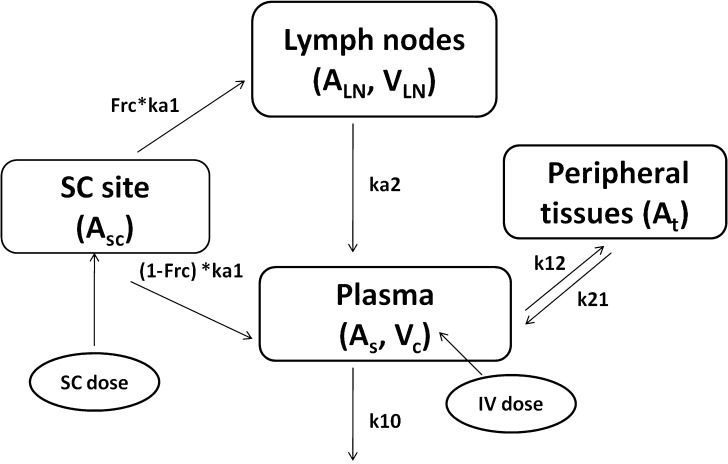

In [7]:
import sympy
from mira.metamodel import *
from mira.modeling import Model
from mira.modeling.viz import GraphicalModel
from mira.modeling.askenet.petrinet import AskeNetPetriNetModel

In [2]:
c = {
    'As_iv': Concept(name='As_iv'),
    'At_iv': Concept(name='At_iv'),
    'As_sc': Concept(name='As_sc'),
    'At_sc': Concept(name='At_sc'),
    'ALN_sc': Concept(name='ALN_sc'),
    'A_sc': Concept(name='A_sc')
}

As_iv, At_iv, As_sc, At_sc, ALN_sc, A_sc = sympy.symbols('As_iv At_iv As_sc At_sc ALN_sc A_sc')
ka1, ka2, k10, k12, k21, Frc, SC_dose, IV_dose, BIO = sympy.symbols('ka1 ka2 k10 k12 k21 Frc SC_dose IV_dose BIO')

In [3]:
parameters = {
    'ka1': Parameter(name='ka1', value=None),
    'ka2': Parameter(name='ka2', value=None),
    'k10': Parameter(name='k10', value=None),
    'k12': Parameter(name='k12', value=None),
    'k21': Parameter(name='k21', value=None),
    'Frc': Parameter(name='Frc', value=None),
    'BIO': Parameter(name='BIO', value=None),
}


templates = [
    # IV dose to plasma/tissue
    NaturalConversion(subject=c['As_iv'], outcome=c['At_iv'], rate_law=As_iv*k12),
    NaturalConversion(subject=c['At_iv'], outcome=c['As_iv'], rate_law=At_iv*k21),
    NaturalDegradation(subject=c['As_iv'], rate_law=As_iv*k10),
    
    # SC dose to plasma/tissue
    NaturalConversion(subject=c['As_sc'], outcome=c['At_sc'], rate_law=As_sc*k12),
    NaturalConversion(subject=c['At_sc'], outcome=c['As_sc'], rate_law=At_sc*k21),
    NaturalDegradation(subject=c['As_sc'], rate_law=As_sc*k10),
    
    # SC dose to plasma/lymph nodes
    NaturalConversion(subject=c['ALN_sc'], outcome=c['As_sc'], rate_law=ALN_sc*ka2),
    NaturalConversion(subject=c['A_sc'], outcome=c['As_sc'], rate_law=BIO*(1-Frc)*ka1*A_sc),
    NaturalConversion(subject=c['A_sc'], outcome=c['ALN_sc'], rate_law=BIO*Frc*ka1*A_sc),
]

In [4]:
observables = {
    'A_t': Observable(name='At', expression=At_iv + At_sc),
    'A_s': Observable(name='As', expression=As_iv + As_sc),
}

In [5]:
tm = TemplateModel(
    templates=templates,
    parameters=parameters,
)

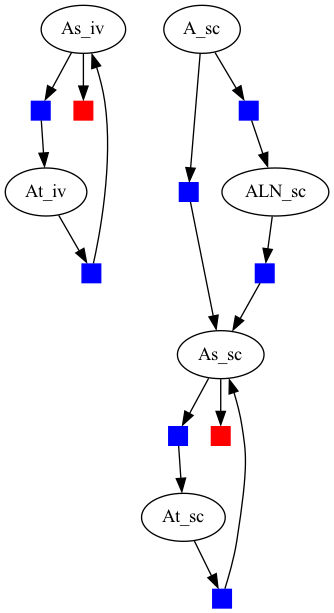

In [6]:
GraphicalModel.for_jupyter(tm)

In [8]:
AskeNetPetriNetModel(Model(tm)).to_json()

{'name': 'Model',
 'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/petrinet_v0.5/petrinet/petrinet_schema.json',
 'schema_name': 'petrinet',
 'description': 'Model',
 'model_version': '0.1',
 'properties': {},
 'model': {'states': [{'id': 'As_iv',
    'name': 'As_iv',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'At_iv',
    'name': 'At_iv',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'As_sc',
    'name': 'As_sc',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'At_sc',
    'name': 'At_sc',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'ALN_sc',
    'name': 'ALN_sc',
    'grounding': {'identifiers': {}, 'modifiers': {}}},
   {'id': 'A_sc',
    'name': 'A_sc',
    'grounding': {'identifiers': {}, 'modifiers': {}}}],
  'transitions': [{'id': 't1',
    'input': ['As_iv'],
    'output': ['At_iv'],
    'properties': {'name': 't1'}},
   {'id': 't2',
    'input': ['At_iv'],
    'out